In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [2]:
# csv content: Crude suicide rates (per 100000 population) for different age rates in 2016.
s_rates_2016_ages = pd.read_csv('/Users/soul/Desktop/IronHack/VideoGame_Analysis/Data/SDGSUICIDE.csv')

In [4]:
# csv content: Age-standarized suicide rates (per 100000 population) for each country and divided by gender.
age_stand_suicide_rate = pd.read_csv('/Users/soul/Desktop/IronHack/VideoGame_Analysis/Data/MH_12.csv')
age_stand_suicide_rate.head()

,Unnamed: 0,Unnamed: 1,Age-standardized suicide rates (per 100 000 population),Age-standardized suicide rates (per 100 000 population).1,Age-standardized suicide rates (per 100 000 population).2,Age-standardized suicide rates (per 100 000 population).3
0,Country,Sex,2016.0,2015.0,2010.0,2000.0
1,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
2,Afghanistan,Male,10.6,10.9,12.5,14.3
3,Afghanistan,Female,2.1,2.1,2.1,1.7
4,Albania,Both sexes,5.6,5.3,7.7,5.8


In [5]:
# Changing column names.
age_stand_suicide_rate = age_stand_suicide_rate.rename(
    columns={'Unnamed: 0': 'Country', 'Unnamed: 1': 'Sex', 
             'Age-standardized suicide rates (per 100 000 population)': 2016,
             'Age-standardized suicide rates (per 100 000 population).1': 2015,
             'Age-standardized suicide rates (per 100 000 population).2': 2010,
             'Age-standardized suicide rates (per 100 000 population).3': 2000
            }
)

# Erasing the first row, since I'll use it as the column names.
age_stand_suicide_rate = age_stand_suicide_rate.drop(0, axis=0)

# These columns' information started with a leading whitespace, so we eleminate it.
age_stand_suicide_rate['Sex'] = age_stand_suicide_rate['Sex'].apply(str.strip)


In [6]:
# Creating table that only contains information for both sexes.
both = age_stand_suicide_rate[age_stand_suicide_rate['Sex'] == 'Both sexes']
both = both.sort_values(by= 2016, ascending=False).reset_index(drop= True)
both.head()

,Country,Sex,2016,2015,2010,2000
0,Guyana,Both sexes,30.2,30.3,29.3,26.7
1,Lesotho,Both sexes,28.9,28.5,27.6,26.8
2,Russian Federation,Both sexes,26.5,27.5,34.5,47.5
3,Lithuania,Both sexes,25.7,28.8,31.3,46.3
4,Suriname,Both sexes,23.2,24.4,28.3,26.4


In [7]:
# Creating table that only contains information for males.
male = age_stand_suicide_rate[age_stand_suicide_rate['Sex'] == 'Male']
male = male.sort_values(by= 2016, ascending=False).reset_index(drop= True)
male.head()

,Country,Sex,2016,2015,2010,2000
0,Russian Federation,Male,48.3,49.9,62.3,85.8
1,Lithuania,Male,47.5,51.5,56.4,81.7
2,Guyana,Male,46.6,46.6,44.9,41.2
3,Kazakhstan,Male,40.1,44.2,56.1,63.1
4,Belarus,Male,39.3,39.2,58.1,70.4


In [8]:
# Creating table that only contains information for females.
female = age_stand_suicide_rate[age_stand_suicide_rate['Sex'] == 'Female']
female = female.sort_values(by= 2016, ascending=False).reset_index(drop= True)
female.head()

,Country,Sex,2016,2015,2010,2000
0,Lesotho,Female,32.6,32.1,31.0,30.2
1,Uganda,Female,18.7,19.2,22.0,23.9
2,Nigeria,Female,17.1,17.6,20.1,20.6
3,India,Female,14.5,14.7,15.1,16.1
4,Guyana,Female,14.2,14.3,14.1,12.8


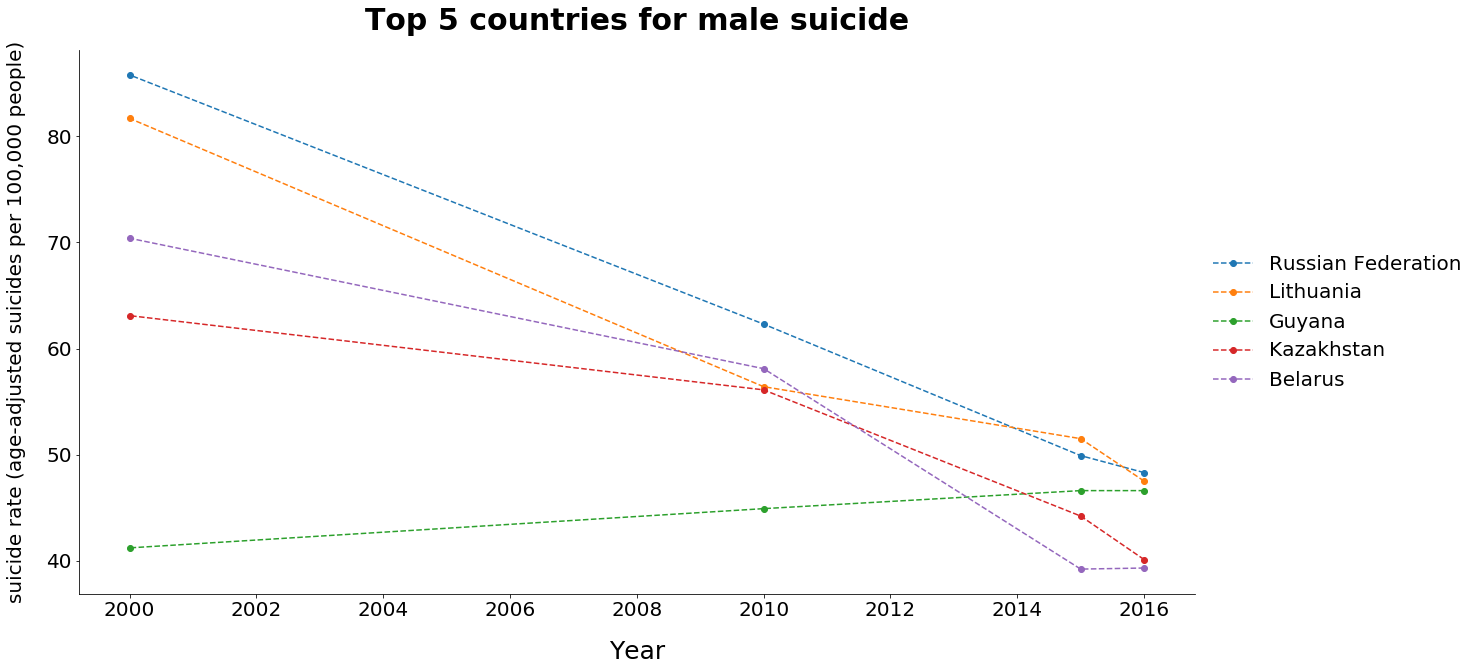

In [18]:
# Top 5 countries with more male suicide rate for 2016.
# Male suicide rates from 2000 to 2016.
# Creating plot.
figure, ax = plt.subplots(1, 1, figsize=(20,10))
plt.plot(male.columns[2:], [male[i].head(5) for i in male.columns[2:]], linestyle='--', marker='o')
plt.legend(tuple(i for i in male.Country), frameon=False, 
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

# Altering aesthetic parts of the plot.
plt.xlabel('Year', fontsize=25, labelpad=20)
plt.ylabel('suicide rate (age-adjusted suicides per 100,000 people)', fontsize=20, labelpad=20)
plt.title('Top 5 countries for male suicide', fontdict={'fontsize': 30, 'fontweight': 600}, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()
plt.show()

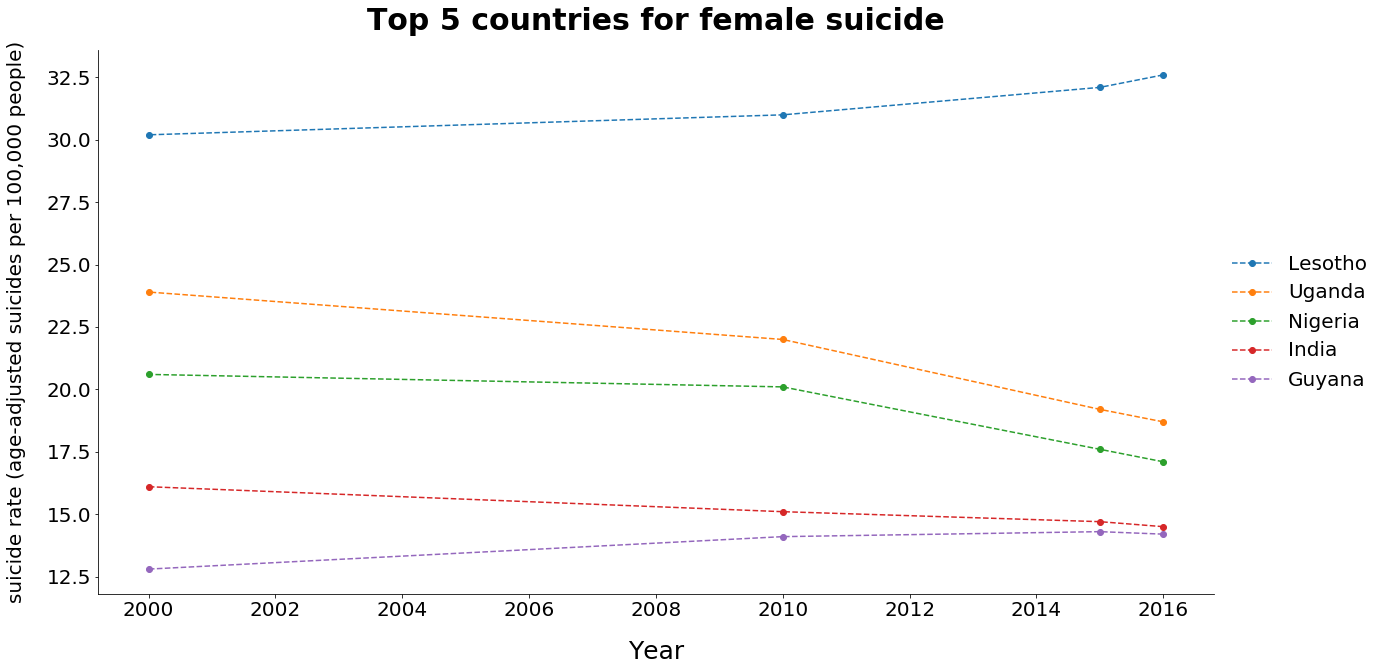

In [19]:
# Top 5 countries with more female suicide rate for 2016.
# Female suicide rates from 2000 to 2016.
# Creating plot.
figure, ax = plt.subplots(1, 1, figsize=(20,10))
plt.plot(female.columns[2:], [female[i].head(5) for i in female.columns[2:]], linestyle='--', marker='o')
plt.legend(tuple(i for i in female.Country), frameon=False,
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

# Altering aesthetic parts of the plot.
plt.xlabel('Year', fontsize=25, labelpad=20)
plt.ylabel('suicide rate (age-adjusted suicides per 100,000 people)', fontsize=20, labelpad=20)
plt.title('Top 5 countries for female suicide', fontdict={'fontsize': 30, 'fontweight': 600}, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()
plt.show()

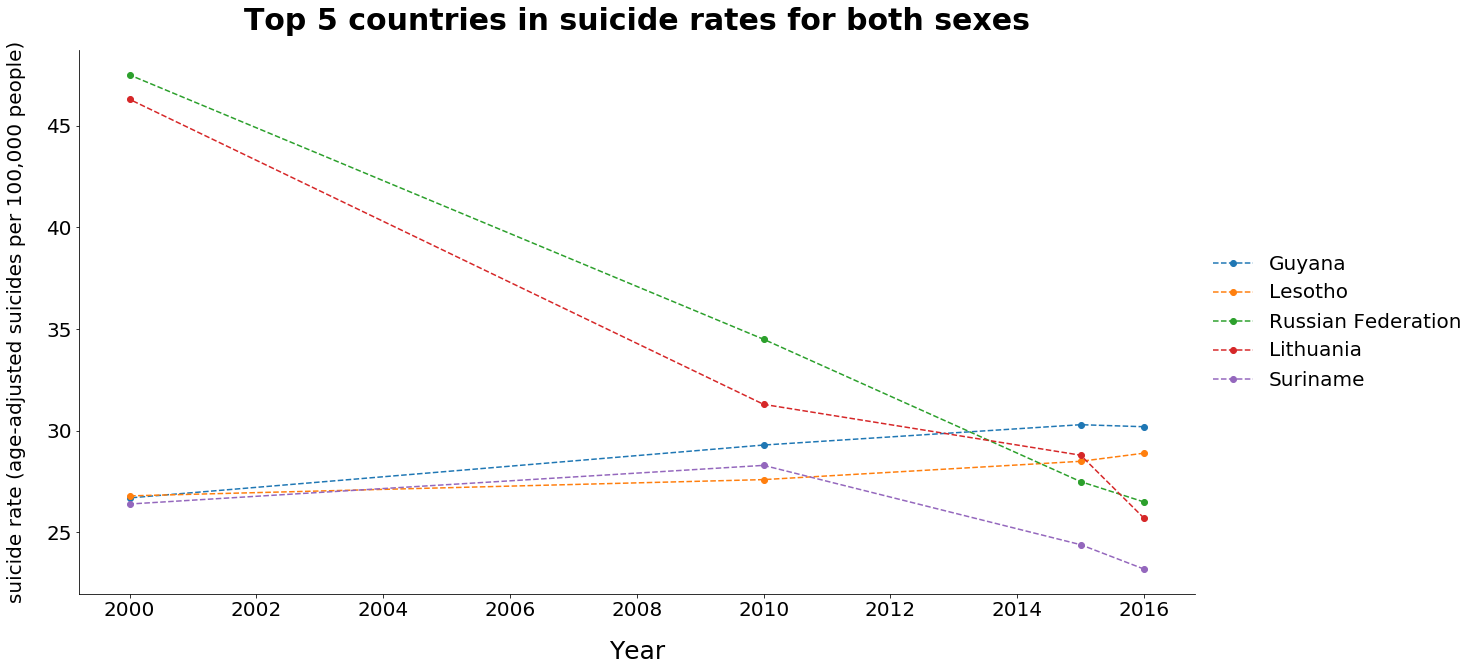

In [21]:
# Top 5 countries with more suicide rate for both sexes in 2016.
# Suicide rates from 2000 to 2016
figure, ax = plt.subplots(1, 1, figsize=(20,10))
plt.plot(both.columns[2:], [both[i].head(5) for i in both.columns[2:]], linestyle='--', marker='o')
plt.legend(tuple(i for i in both.Country), frameon=False,
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

# Altering aesthetic parts of the plot.
plt.xlabel('Year', fontsize=25, labelpad=20)
plt.ylabel('suicide rate (age-adjusted suicides per 100,000 people)', fontsize=20, labelpad=20)
plt.title('Top 5 countries in suicide rates for both sexes', fontdict={'fontsize': 30, 'fontweight': 600}, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()
plt.show()

In [25]:
# Creating aggregate table. Mean suicide rate for both sexes in all countries
mean_srate = both.groupby(by='Sex').mean()
mean_srate


,2016,2015,2010,2000
Sex,,,,
Both sexes,9.682514,9.807104,10.414754,11.996721


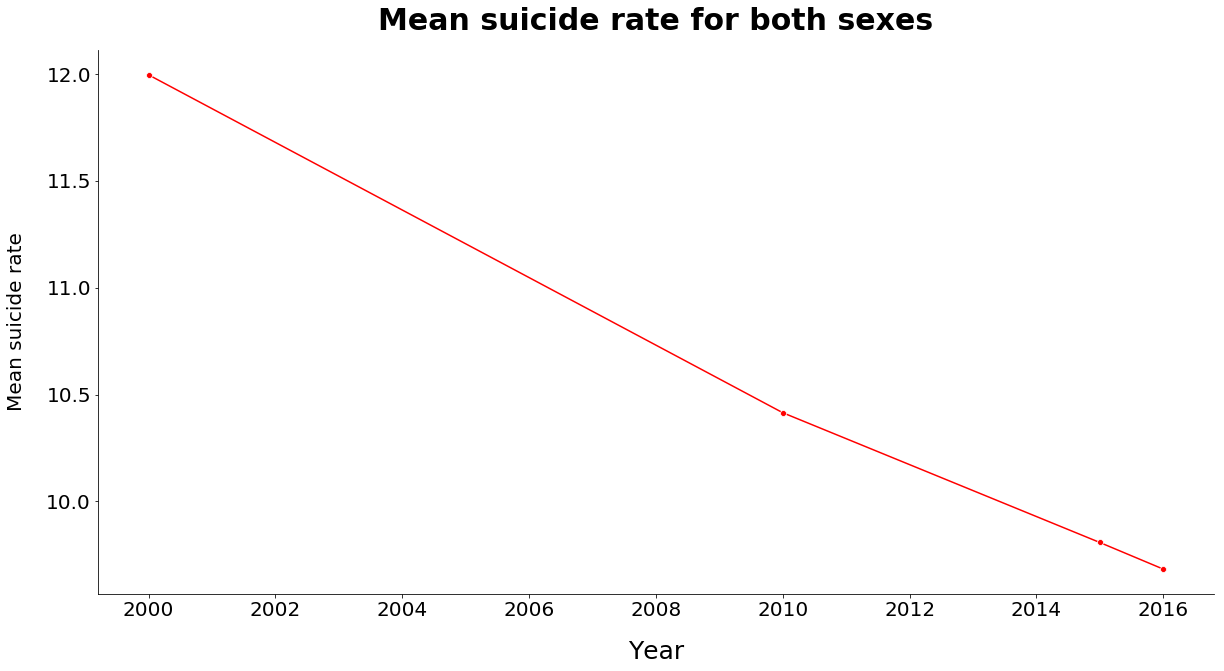

In [26]:
# Plotting evolution of mean suicide rate over the years.

# Creating plot.
plt.subplots(figsize=(20, 10))
sns.lineplot(both.columns[2:], x.iloc[0], linestyle='--', marker='o', color='red')

# Altering aesthetic parts of the plot.
plt.xlabel('Year', fontsize=25, labelpad=20)
plt.ylabel('Mean suicide rate', fontsize=20, labelpad=20)
plt.title('Mean suicide rate for both sexes', fontdict={'fontsize': 30, 'fontweight': 600}, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()
plt.show()